In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Pesquisa com Jovens sobre Consumo de Notícias (Responses).ods")

In [3]:
data.columns

Index(['Timestamp', 'Email Address', 'Quantos anos você tem? ', 'Outro',
       'Como você se identifica etnicamente?', 'Qual sua classe social?',
       'Você consome notícias no dia a dia?', 'Se não, por quê?',
       'Se sim, como você consome notícias no dia a dia?',
       'Quais tipos de conteúdo jornalístico mais te interessam?',
       'Quando o assunto é jornalismo, o que você menos gosta?',
       'Ao consumir notícias nas redes sociais, quais os formatos que mais chamam sua atenção?',
       'Quais canais de comunicação você mais consome?',
       'E o que você mais valoriza nesses canais?',
       'Quais desses canais de comunicação você diria que se conectam mais com o jovem de hoje em dia?',
       'O quanto você enxerga representatividade (racial, de gênero, orientação sexual e faixa etária) nos canais de comunicação hoje em dia?',
       'Você lembra de ter consumido conteúdo da CNN Brasil nos últimos 12 meses?',
       'Se sim, onde você consumiu esse conteúdo?',
     

In [4]:
data.columns = ["timestamp","email","age","gender","ethnicity","social_class",
                "consome_noticias","pq_nao","day_to_day","content_types",
                "least_liked","social_media_formats","channels","valued_traits",
                "which_channels","representativity","cnn_last_12","cnn_where",
                "cnn_diversity","cnn_age_diversity","cnn_ideology","cnn_channels",
                "cnn_percepion"]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             422 non-null    datetime64[ns]
 1   email                 422 non-null    object        
 2   age                   407 non-null    float64       
 3   gender                422 non-null    object        
 4   ethnicity             422 non-null    object        
 5   social_class          422 non-null    object        
 6   consome_noticias      422 non-null    object        
 7   pq_nao                42 non-null     object        
 8   day_to_day            422 non-null    object        
 9   content_types         422 non-null    object        
 10  least_liked           422 non-null    object        
 11  social_media_formats  422 non-null    object        
 12  channels              422 non-null    object        
 13  valued_traits       

In [6]:
data_completed_age = data.dropna(how="any",subset=["age","cnn_where"],
                                 ignore_index=True)

In [7]:
data_completed_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             358 non-null    datetime64[ns]
 1   email                 358 non-null    object        
 2   age                   358 non-null    float64       
 3   gender                358 non-null    object        
 4   ethnicity             358 non-null    object        
 5   social_class          358 non-null    object        
 6   consome_noticias      358 non-null    object        
 7   pq_nao                34 non-null     object        
 8   day_to_day            358 non-null    object        
 9   content_types         358 non-null    object        
 10  least_liked           358 non-null    object        
 11  social_media_formats  358 non-null    object        
 12  channels              358 non-null    object        
 13  valued_traits       

In [8]:
df = data_completed_age.drop(columns=["timestamp","email"])

In [9]:
df["age"] = [int(i) for i in df["age"]]
df.head()

,age,gender,ethnicity,social_class,consome_noticias,pq_nao,day_to_day,content_types,least_liked,social_media_formats,...,valued_traits,which_channels,representativity,cnn_last_12,cnn_where,cnn_diversity,cnn_age_diversity,cnn_ideology,cnn_channels,cnn_percepion
0,20,Masculino,Branco,Classe média,Sim,NaN,"Televisão, Redes sociais, YouTube","Política e economia, Cultura pop e entretenime...","Linguagem engessada, Falta de diversidade, Sen...","Vídeos curtos (ex: TikTok, Reels, Shorts), Víd...",...,"Credibilidade, Furos e agilidade, Os profissio...","g1, Metrópoles",Vejo alguma representatividade,Sim,Instagram,Não sei,Não percebo diversidade de idades,Neutra,Não,"Confiável, Informativa, Tradicional, Acessível"
1,21,Masculino,Branco,Classe média alta,Sim,NaN,"Sites de notícia, Redes sociais, YouTube, Podc...","Política e economia, Cultura pop e entretenime...","Linguagem engessada, Falta de diversidade, Sen...","Vídeos curtos (ex: TikTok, Reels, Shorts), Víd...",...,"Credibilidade, Fofocas e virais, Furos e agili...","g1, Metrópoles, Jovem Pan, Choquei",Vejo pouca representatividade,Sim,Televisão,Não sei,Não sei,Conservadora,Não,"Confiável, Engessada, Elitista, Informativa, D..."
2,20,Feminino,Preto,Classe média,Sim,NaN,Redes sociais,"Cultura pop e entretenimento, Fofocas e virais...","Linguagem engessada, Conteúdo raso, Muita opin...","Vídeos curtos (ex: TikTok, Reels, Shorts), Car...",...,"Credibilidade, Facilidade de acesso, Design at...","g1, Metrópoles, Choquei",Vejo alguma representatividade,Sim,Instagram,Um pouco de diversidade,Um pouco de diversidade de idades,Neutra,Sim,"Confiável, Informativa, Atualizada, Acessível"
3,22,Masculino,Branco,Classe média alta,Sim,NaN,"Sites de notícia, Redes sociais, YouTube","Política e economia, Cultura pop e entretenime...","Sensacionalismo, Muita opinião, pouca informação","Vídeos curtos (ex: TikTok, Reels, Shorts), Víd...",...,"Facilidade de acesso, Design atrativo","Metrópoles, Choquei",Vejo alguma representatividade,Não tenho certeza,Não lembro,Não sei,Não sei,Não sei,Não,"Não consumo, então não tenho uma opinião formada"
4,18,Feminino,Branco,Classe média,Sim,NaN,"Sites de notícia, Redes sociais","Fofocas e virais, Lifestyle, Viagem & Gastrono...",Conteúdo raso,"Vídeos curtos (ex: TikTok, Reels, Shorts), Sto...",...,"Credibilidade, Imparcialidade ideológica, Os p...","g1, CNN Brasil, Metrópoles",Vejo alguma representatividade,Não tenho certeza,Não lembro,Não sei,"Sim, muita diversidade de idades",Não sei,Não tenho certeza,"Confiável, Inovadora, Informativa, Atualizada,..."


## Gênero

In [10]:
gender_count = df["gender"].value_counts()
gender_count

gender
Masculino    182
Feminino     166
Outro         10
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cc18e1a570>,
 [Text(-0.028955500568628167, 1.0996188334995087, 'Masculino'),
  Text(-0.06752837658712506, -1.097925279040203, 'Feminino'),
  Text(1.0957672436425536, -0.09640616038407948, 'Outro')],
 [Text(-0.015793909401069908, 0.599792090999732, '50.84%'),
  Text(-0.03683365995661367, -0.5988683340219288, '46.37%'),
  Text(0.5976912238050291, -0.05258517839131607, '2.79%')])

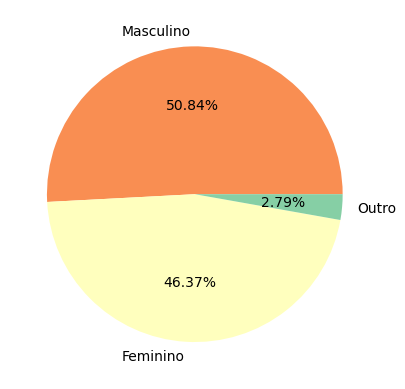

In [15]:
plt.pie(gender_count, labels=gender_count.index,
        colors=sns.color_palette("Spectral", n_colors=3),
        autopct="%1.2f%%")

### Não é representativo da população brasileira

## Idade

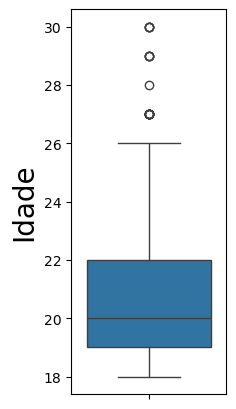

In [12]:
plt.figure(figsize=(2,5))
ax = sns.boxplot(y=df["age"])
ax.set_ylabel("Idade",fontsize=20)
plt.show()

In [31]:
df.describe()

,age
count,358.000000
mean,21.041899
std,2.815708
min,18.000000
25%,19.000000
50%,20.000000
75%,22.000000
max,30.000000


Média de idade: 21 anos
Desvio padrão: 2,8157
Idade mínima observada: 18
Idade máxima observada: 30 (>26 anos são outliers)

## Autodeclaração de raça

In [16]:
ethnic_count = df["ethnicity"].value_counts()
ethnic_count

ethnicity
Branco               227
Pardo                 87
Preto                 34
Amarelo                5
Prefiro não dizer      3
Indígena               1
Moreno                 1
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cc18e50590>,
 [Text(-0.44976068056253304, 1.0038502528863193, 'Branco'),
  Text(0.038604163952658886, -1.099322390623204, 'Pardo'),
  Text(0.9787893106140982, -0.5019676139230285, 'Preto'),
  Text(1.0904840958704956, -0.14437602520331405, 'Amarelo'),
  Text(1.0979253222417866, -0.06752767418080871, 'Prefiro não dizer'),
  Text(1.0996188398279083, -0.028955260239289057, 'Indígena'),
  Text(1.09995764935487, -0.009652441437744136, 'Moreno')],
 [Text(-0.24532400757956346, 0.5475546833925378, '63.41%'),
  Text(0.0210568167014503, -0.5996303948853839, '24.30%'),
  Text(0.5338850785167808, -0.2738005166852882, '9.50%'),
  Text(0.5948095068384521, -0.07875055920180767, '1.40%'),
  Text(0.598868357586429, -0.036833276825895656, '0.84%'),
  Text(0.5997920944515863, -0.015793778312339482, '0.28%'),
  Text(0.5999768996481109, -0.005264968056951346, '0.28%')])

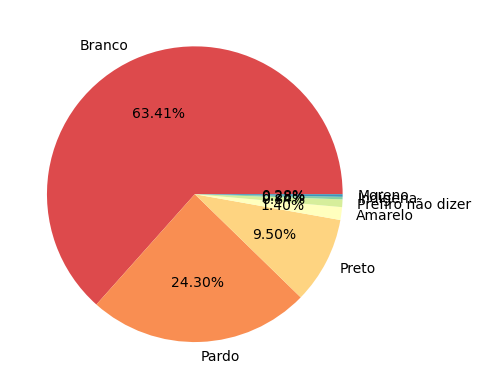

In [17]:
plt.pie(ethnic_count, labels=ethnic_count.index,
        colors=sns.color_palette("Spectral", n_colors=7),
        autopct="%1.2f%%")

### Não é representativo da população brasileira

## Consome notícias?

In [19]:
consome_count = df["consome_noticias"].value_counts()
consome_count

consome_noticias
Sim    326
Não     32
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cc1b7cc9e0>,
 [Text(-1.0569135937498784, 0.30485021788858396, 'Sim'),
  Text(1.056913620400728, -0.3048501254902582, 'Não')],
 [Text(-0.57649832386357, 0.1662819370301367, '91.06%'),
  Text(0.576498338400397, -0.16628188663104992, '8.94%')])

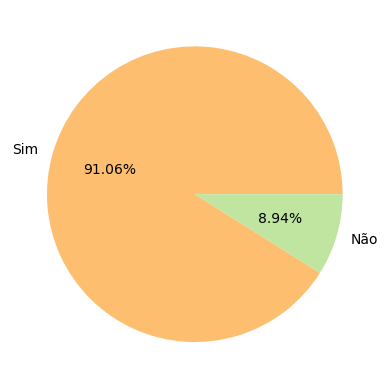

In [20]:
plt.pie(consome_count, labels=consome_count.index,
        colors=sns.color_palette("Spectral", n_colors=2),
        autopct="%1.2f%%")

## Classe Social

In [13]:
sc_count = df["social_class"].value_counts()
sc_count

social_class
Classe média          121
Classe média alta     113
Classe média baixa     67
Classe baixa           22
Classe alta            20
Prefiro não dizer      15
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cc18dc7260>,
 [Text(0.5360088239409921, 0.9605699040972472, 'Classe média'),
  Text(-1.0996188303930288, 0.028955618540584788, 'Classe média alta'),
  Text(-0.01930503555191347, -1.0998305849549463, 'Classe média baixa'),
  Text(0.7605675309915184, -0.7946930418730656, 'Classe baixa'),
  Text(0.995802316883167, -0.4673090473018012, 'Classe alta'),
  Text(1.0904840958704956, -0.14437602520331405, 'Prefiro não dizer')],
 [Text(0.2923684494223593, 0.5239472204166803, '33.80%'),
  Text(-0.5997920893052883, 0.01579397374940988, '31.56%'),
  Text(-0.010530019391952802, -0.599907591793607, '18.72%'),
  Text(0.4148550169044645, -0.43346893193076297, '6.15%'),
  Text(0.543164900118091, -0.25489584398280063, '5.59%'),
  Text(0.5948095068384521, -0.07875055920180767, '4.19%')])

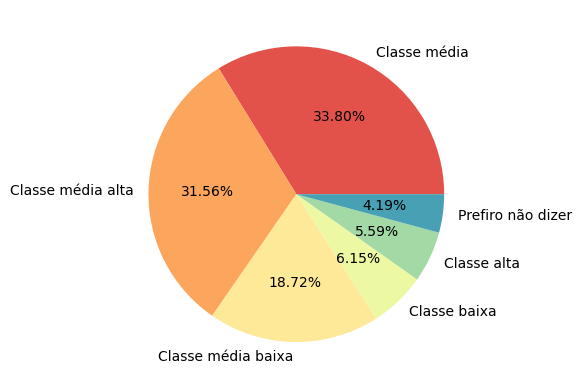

In [14]:
plt.pie(sc_count, labels=sc_count.index,
        colors=sns.color_palette("Spectral", n_colors=6),
        autopct="%1.2f%%")

## Modo de consumo de notícias

In [27]:
import numpy as np
tv = []
radio = []
impresso = []
websites = []
socials = []
youtube = []
podcasts = []
nothing = []
for i in df["day_to_day"]:
    if "Televisão" in i:
        tv.append(i)
    if "Rádio" in i:
        radio.append(i)
    if "Jornal Impresso" in i:
        impresso.append(i)
    if "Sites de notícia" in i:
        websites.append(i)
    if "Redes sociais" in i:
        socials.append(i)
    if "YouTube" in i:
        youtube.append(i)
    if "Podcasts" in i:
        podcasts.append(i)
    if "Não consumo" in i:
        nothing.append(i)

full_medium_list = []
for i in range(0,len(tv)):
    full_medium_list.append("Televisão")
for i in range(0,len(radio)):
    full_medium_list.append("Rádio")
for i in range(0,len(impresso)):
    full_medium_list.append("Jornal Impresso")
for i in range(0,len(websites)):
    full_medium_list.append("Sites de notícia")
for i in range(0,len(socials)):
    full_medium_list.append("Redes sociais")
for i in range(0,len(youtube)):
    full_medium_list.append("YouTube")
for i in range(0,len(podcasts)):
    full_medium_list.append("Podcasts")
for i in range(0,len(nothing)):
    full_medium_list.append("Não consumo")
    

medium_df = pd.DataFrame({"day_to_day":["Televisão",
                                        "Rádio",
                                        "Jornal Impresso",
                                        "Sites de notícia",
                                        "Redes sociais",
                                        "YouTube",
                                        "Podcasts",
                                        "Não consumo"],
                          "count":[len(tv),len(radio),
                                   len(impresso),len(websites),
                                   len(socials),len(youtube),
                                   len(podcasts),len(nothing)]})
medium_df

,day_to_day,count
0,Televisão,152
1,Rádio,25
2,Jornal Impresso,0
3,Sites de notícia,206
4,Redes sociais,312
5,YouTube,154
6,Podcasts,125
7,Não consumo,15


Text(0.5, 0, 'Número de respostas')

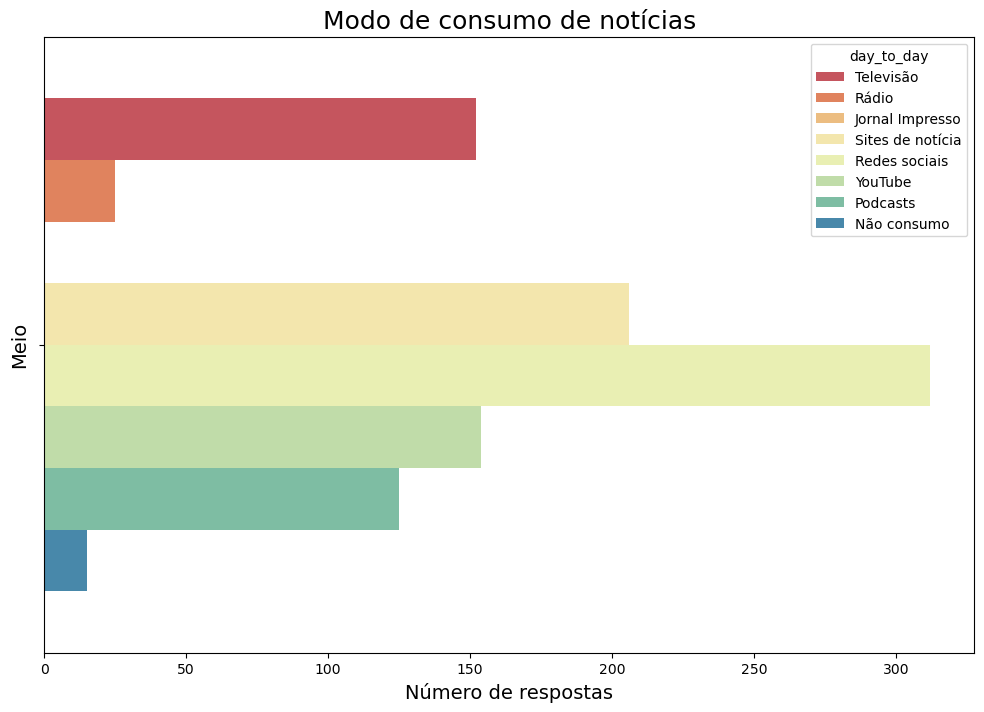

In [28]:
plt.figure(figsize=(12,8))
ax = sns.barplot(medium_df,x="count",hue="day_to_day",palette="Spectral")
ax.axes.set_title("Modo de consumo de notícias",fontsize=18)
ax.set_ylabel("Meio",fontsize=14)
ax.set_xlabel("Número de respostas",fontsize=14)

## Tipos de Conteúdo Jornalístico

In [32]:
pol_eco = []
pop_ent = []
gossip = []
lifestyle = []
travel_food = []
business = []
sci_env = []
sports = []
education = []
nothing = []
for i in df["content_types"]:
    if "Política e economia" in i:
        pol_eco.append(i)
    if "Cultura pop e entretenimento" in i:
        pop_ent.append(i)
    if "Fofocas e virais" in i:
        gossip.append(i)
    if "Lifestyle" in i:
        lifestyle.append(i)
    if "Viagem & Gastronomia" in i:
        travel_food.append(i)
    if "Negócios e empreendedorismo" in i:
        business.append(i)
    if "Ciência e meio ambiente" in i:
        sci_env.append(i)
    if "Esportes" in i:
        sports.append(i)
    if "Educação" in i:
        education.append(i)
    if "Não consumo, então não tenho uma opinião formada" in i:
        nothing.append(i)

full_ct_list = []
for i in range(0,len(pol_eco)):
    full_medium_list.append("Política e economia")
for i in range(0,len(pop_ent)):
    full_medium_list.append("Cultura pop e entretenimento")
for i in range(0,len(gossip)):
    full_medium_list.append("Fofocas e virais")
for i in range(0,len(lifestyle)):
    full_medium_list.append("Lifestyle")
for i in range(0,len(travel_food)):
    full_medium_list.append("Viagem & Gastronomia")
for i in range(0,len(business)):
    full_medium_list.append("Negócios e empreendedorismo")
for i in range(0,len(sci_env)):
    full_medium_list.append("Ciência e meio ambiente")
for i in range(0,len(sports)):
    full_medium_list.append("Esportes")
for i in range(0,len(education)):
    full_medium_list.append("Educação")
for i in range(0,len(nothing)):
    full_medium_list.append("Não consumo")
    

ct_df = pd.DataFrame({"content_types":["Política e economia",
                                           "Cultura pop e entretenimento",
                                           "Fofocas e virais",
                                           "Lifestyle",
                                           "Viagem & Gastronomia",
                                           "Negócios e empreendedorismo",
                                           "Ciência e meio ambiente",
                                           "Esportes",
                                           "Educação",
                                           "Não consumo"],
                          "count":[len(pol_eco),len(pop_ent),
                                   len(gossip),len(lifestyle),
                                   len(travel_food),len(business),
                                   len(sci_env),len(sports),
                                   len(education),len(nothing)]})
ct_df

,content_types,count
0,Política e economia,243
1,Cultura pop e entretenimento,216
2,Fofocas e virais,122
3,Lifestyle,126
4,Viagem & Gastronomia,170
5,Negócios e empreendedorismo,102
6,Ciência e meio ambiente,166
7,Esportes,132
8,Educação,116
9,Não consumo,8


Text(0.5, 0, 'Número de respostas')

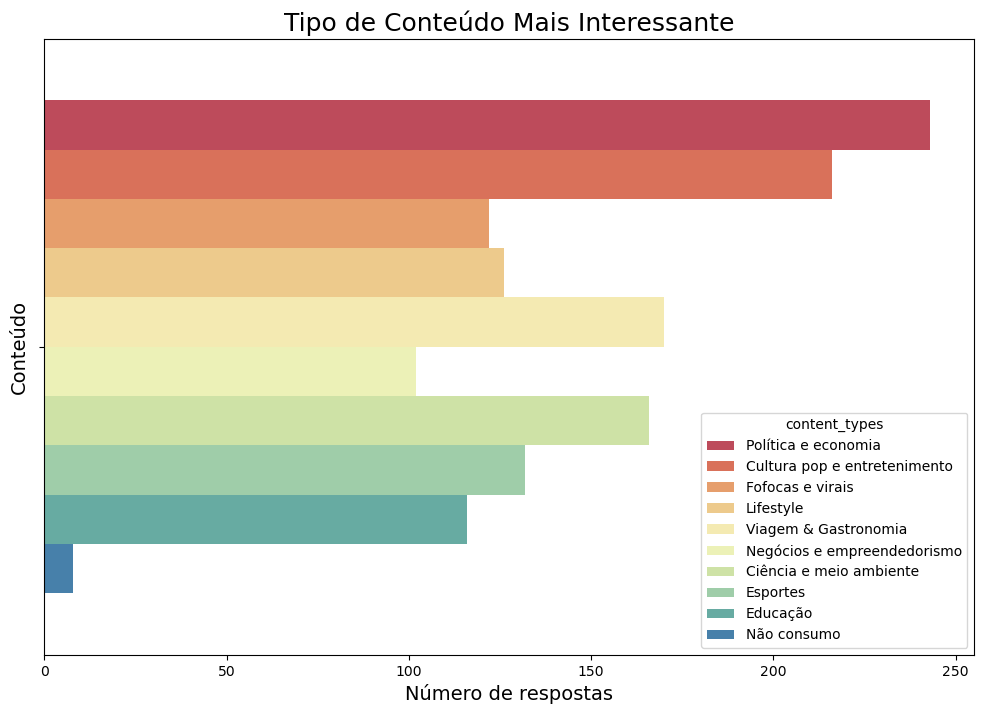

In [36]:
plt.figure(figsize=(12,8))
ax = sns.barplot(ct_df,x="count",hue="content_types",palette="Spectral")
ax.axes.set_title("Tipo de Conteúdo Mais Interessante",fontsize=18)
ax.set_ylabel("Conteúdo",fontsize=14)
ax.set_xlabel("Número de respostas",fontsize=14)

## Características que causam rejeição

In [34]:
vocab = []
lacks_diversity = []
sensationalism = []
shallow = []
lacks_innovation = []
more_op_less_info = []
more_info_less_op = []
nothing = []
for i in df["least_liked"]:
    if "Linguagem engessada" in i:
        vocab.append(i)
    if "Falta de diversidade" in i:
        lacks_diversity.append(i)
    if "Sensacionalismo" in i:
        sensationalism.append(i)
    if "Conteúdo raso" in i:
        shallow.append(i)
    if "Falta de inovação" in i:
        lacks_innovation.append(i)
    if "Muita opinião, pouca informação" in i:
        more_op_less_info.append(i)
    if "Muita informação, pouca opinião" in i:
        more_info_less_op.append(i)
    if "Não consumo, então não tenho uma opinião formada" in i:
        nothing.append(i)

full_ct_list = []
for i in range(0,len(vocab)):
    full_medium_list.append("Linguagem engessada")
for i in range(0,len(lacks_diversity)):
    full_medium_list.append("Falta de diversidade")
for i in range(0,len(sensationalism)):
    full_medium_list.append("Sensacionalismo")
for i in range(0,len(shallow)):
    full_medium_list.append("Conteúdo raso")
for i in range(0,len(lacks_innovation)):
    full_medium_list.append("Falta de inovação")
for i in range(0,len(more_op_less_info)):
    full_medium_list.append("Muita opinião, pouca informação")
for i in range(0,len(more_info_less_op)):
    full_medium_list.append("Muita informação, pouca opinião")
for i in range(0,len(nothing)):
    full_medium_list.append("Não consumo")
    

disliked_traits_df = pd.DataFrame({"disliked_traits":["Linguagem engessada",
                                       "Falta de diversidade",
                                       "Sensacionalismo",
                                       "Conteúdo raso",
                                       "Falta de inovação",
                                       "Muita opinião, pouca informação",
                                       "Muita informação, pouca opinião",
                                       "Não consumo"],
                                   "count":[len(vocab),len(lacks_diversity),
                                            len(sensationalism),len(shallow),
                                            len(lacks_innovation),len(more_op_less_info),
                                            len(more_info_less_op),len(nothing)]})
disliked_traits_df

,disliked_traits,count
0,Linguagem engessada,126
1,Falta de diversidade,95
2,Sensacionalismo,256
3,Conteúdo raso,212
4,Falta de inovação,59
5,"Muita opinião, pouca informação",181
6,"Muita informação, pouca opinião",20
7,Não consumo,11


Text(0.5, 0, 'Número de respostas')

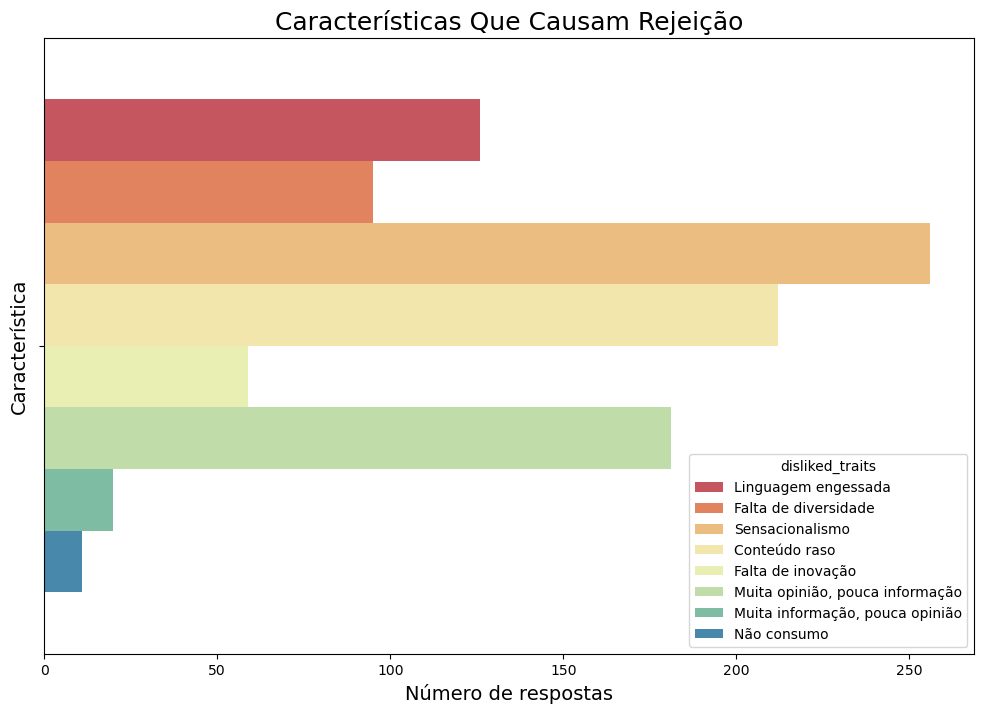

In [37]:
plt.figure(figsize=(12,8))
ax = sns.barplot(disliked_traits_df,x="count",hue="disliked_traits",palette="Spectral")
ax.axes.set_title("Características Que Causam Rejeição",fontsize=18)
ax.set_ylabel("Característica",fontsize=14)
ax.set_xlabel("Número de respostas",fontsize=14)

## Formatos consumidos em Redes Sociais

In [40]:
short_vids = []
long_vids = []
podcasts = []
stories = []
cards = []
horsies = []
short_texts = []
titles_themes = []
lives = []
memes = []
nothing = []
for i in df["social_media_formats"]:
    if "Vídeos curtos (ex: TikTok, Reels, Shorts)" in i:
        short_vids.append(i)
    if "Vídeos longos (ex: YouTube, transmissões ao vivo)" in i:
        long_vids.append(i)
    if "Podcasts" in i:
        podcasts.append(i)
    if "Stories (Instagram, Facebook)" in i:
        stories.append(i)
    if "Cards informativos (imagens estáticas com texto explicativo no feed)" in i:
        cards.append(i)
    if "Carrossel (sequência de slides interativos no feed)" in i:
        horsies.append(i)
    if "Textos curtos (como no X/Threads ou postagens breves nas redes sociais)" in i:
        short_texts.append(i)
    if "Matérias e artigos com títulos ou temas interessantes" in i:
        titles_themes.append(i)
    if "Lives (Instagram, YouTube, Facebook)" in i:
        lives.append(i)
    if "Memes que transmitem notícias ou informações de maneira descontraída" in i:
        memes.append(i)
    if "Não consumo, então não tenho uma opinião formada" in i:
        nothing.append(i)

full_ct_list = []
for i in range(0,len(short_vids)):
    full_medium_list.append("Vídeos curtos")
for i in range(0,len(long_vids)):
    full_medium_list.append("Vídeos longos")
for i in range(0,len(podcasts)):
    full_medium_list.append("Podcasts")
for i in range(0,len(stories)):
    full_medium_list.append("Stories")
for i in range(0,len(cards)):
    full_medium_list.append("Cards informativos")
for i in range(0,len(horsies)):
    full_medium_list.append("Carrossel")
for i in range(0,len(short_texts)):
    full_medium_list.append("Textos curtos")
for i in range(0,len(titles_themes)):
    full_medium_list.append("Matérias e artigos com títulos ou temas interessantes")
for i in range(0,len(lives)):
    full_medium_list.append("Lives")
for i in range(0,len(memes)):
    full_medium_list.append("Memes")
for i in range(0,len(nothing)):
    full_medium_list.append("Não consumo")
    

sf_df = pd.DataFrame({"format":["Vídeos curtos",
                                "Vídeos longos",
                                "Podcasts",
                                "Stories",
                                "Cards informativos",
                                "Carrossel",
                                "Textos curtos",
                                "Matérias e artigos com títulos ou temas interessantes",
                                "Lives",
                                "Memes",
                                "Não consumo"],
                      "count":[len(short_vids),len(long_vids),
                               len(podcasts),len(stories),
                               len(cards),len(horsies),
                               len(short_texts),len(titles_themes),
                               len(lives),len(memes),
                               len(nothing)]})
sf_df

,format,count
0,Vídeos curtos,260
1,Vídeos longos,130
2,Podcasts,126
3,Stories,155
4,Cards informativos,153
5,Carrossel,141
6,Textos curtos,154
7,Matérias e artigos com títulos ou temas intere...,179
8,Lives,18
9,Memes,135


Text(0.5, 0, 'Número de respostas')

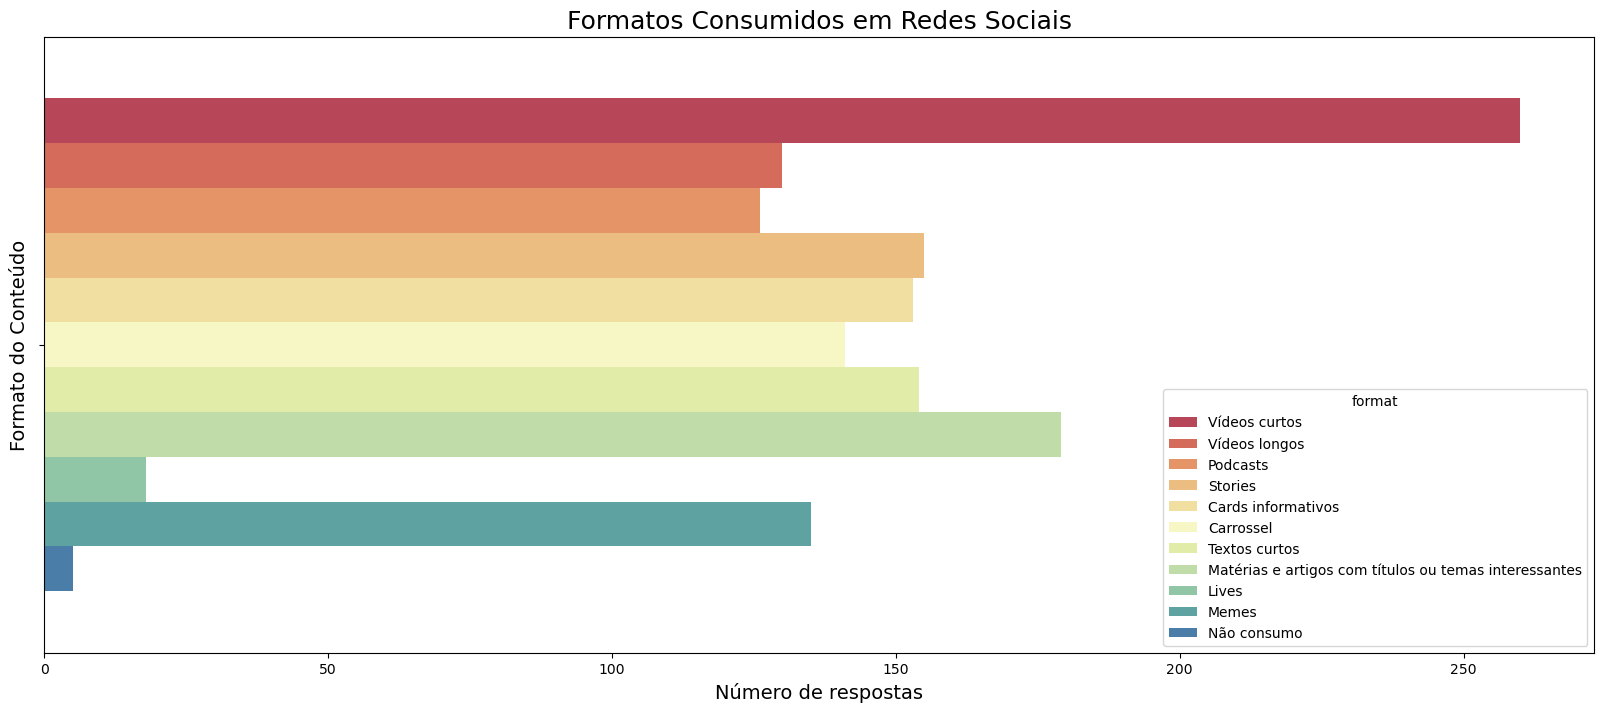

In [42]:
plt.figure(figsize=(20,8))
ax = sns.barplot(sf_df,x="count",hue="format",palette="Spectral")
ax.axes.set_title("Formatos Consumidos em Redes Sociais",fontsize=18)
ax.set_ylabel("Formato do Conteúdo",fontsize=14)
ax.set_xlabel("Número de respostas",fontsize=14)